In [0]:
import numpy as  np
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_blobs
from tqdm import tqdm_notebook 
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML


In [0]:
class SigmoidNeuron:
    
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b_mse(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def grad_w_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred * x
    elif y == 1:
      return -1 * (1 - y_pred) * x
    else:
      raise ValueError("y should be 0 or 1")
    
  def grad_b_ce(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    if y == 0:
      return y_pred 
    elif y == 1:
      return -1 * (1 - y_pred)
    else:
      raise ValueError("y should be 0 or 1")
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        if loss_fn == "mse":
          dw += self.grad_w_mse(x, y)
          db += self.grad_b_mse(x, y) 
        elif loss_fn == "ce":
          dw += self.grad_w_ce(x, y)
          db += self.grad_b_ce(x, y)
          
      m = X.shape[1]  
      self.w -= learning_rate * dw/m
      self.b -= learning_rate * db/m
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        if loss_fn == "mse":
          loss[i] = mean_squared_error(Y, Y_pred)
        elif loss_fn == "ce":
          loss[i] = log_loss(Y, Y_pred)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      if loss_fn == "mse":
        plt.ylabel('Mean Squared Error')
      elif loss_fn == "ce":
        plt.ylabel('Log Loss')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

In [0]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from_list("",["red","yellow","green"])

#Generate Data

In [0]:
data,labels=make_blobs(n_samples=1000,n_features=2,centers=4,random_state=0)
print(data.shape, labels.shape)

(1000, 2) (1000,)


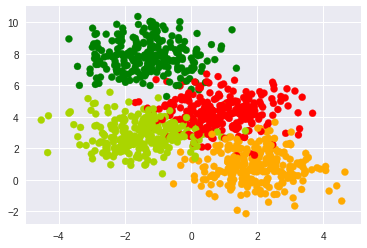

In [0]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
labels_orig = labels
labels = np.mod(labels_orig, 2)

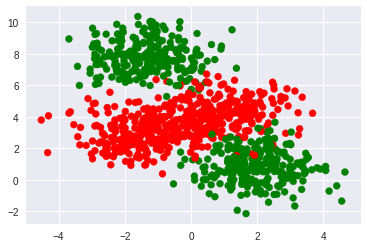

In [0]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap=my_cmap)
plt.show()

In [0]:
X_train,X_val,Y_train,Y_val=train_test_split(data,labels,stratify=labels,random_state=0)
print(X_train.shape,X_val.shape)

(750, 2) (250, 2)


In [0]:
sn=SigmoidNeuron()
#def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):
#sn.fit(X_train,Y_train,epochs=1500,learning_rate=0.5,display_loss=True)

In [0]:
#Y_pred_train=sn.predict(X_train)
#Y_pred_binarised_train=(Y_pred_train>=0.5).astype(int)


In [0]:
#Y_pred_binarised_train=Y_pred_binarised_train.ravel()


In [0]:
#Y_pred_val=sn.predict(X_val)
#Y_pred_binarised_val=((Y_pred_val>=0.5).astype(int)).ravel()


In [0]:
#accuracy_train=accuracy_score(Y_pred_binarised_train,Y_train)
#accuracy_val=accuracy_score(Y_pred_binarised_val,Y_val)

In [0]:
#print(round(accuracy_train,2),round(accuracy_val,2))

In [0]:
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d, Axes3D



In [0]:
"""plt.figure(figsize=(10,7))
ax1=plt.axes(projection='3d')
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)
XX1,XX2=np.meshgrid(X1,X2)
YY=np.zeros(XX1.shape)
for i in range(X2.size):
  for j in range(X1.size):
    YY[i,j]=sn.sigmoid(sn.perceptron(np.asarray([X1[j],X2[i]])))
ax1.plot_surface(XX1, XX2, YY, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax1.scatter3D(list(X_train[:,0]),list(X_train[:,1]),list(Y_train),c=list(Y_train),cmap=my_cmap)
ax1.set_title('surface')
ax1.view_init(20,35)"""


"plt.figure(figsize=(10,7))\nax1=plt.axes(projection='3d')\nX1=np.linspace(-10,10,100)\nX2=np.linspace(-10,10,100)\nXX1,XX2=np.meshgrid(X1,X2)\nYY=np.zeros(XX1.shape)\nfor i in range(X2.size):\n  for j in range(X1.size):\n    YY[i,j]=sn.sigmoid(sn.perceptron(np.asarray([X1[j],X2[i]])))\nax1.plot_surface(XX1, XX2, YY, rstride=1, cstride=1,\n                cmap='viridis', edgecolor='none')\nax1.scatter3D(list(X_train[:,0]),list(X_train[:,1]),list(Y_train),c=list(Y_train),cmap=my_cmap)\nax1.set_title('surface')\nax1.view_init(20,35)"

In [0]:
"""plt.figure(figsize=(15,8))
ax2=plt.subplot()
X1=np.linspace(-20,20,100)
X2=np.linspace(-20,20,100)
XX1,XX2=np.meshgrid(X1,X2)
YY=np.zeros(XX1.shape)
for i in range(X2.size):
  for j in range(X1.size):
    YY[i,j]=sn.sigmoid(sn.perceptron(np.asarray([X1[j],X2[i]])))
ax2.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
ax2.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=my_cmap)
ax2.plot()"""

'plt.figure(figsize=(15,8))\nax2=plt.subplot()\nX1=np.linspace(-20,20,100)\nX2=np.linspace(-20,20,100)\nXX1,XX2=np.meshgrid(X1,X2)\nYY=np.zeros(XX1.shape)\nfor i in range(X2.size):\n  for j in range(X1.size):\n    YY[i,j]=sn.sigmoid(sn.perceptron(np.asarray([X1[j],X2[i]])))\nax2.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)\nax2.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=my_cmap)\nax2.plot()'

In [0]:
"""plt.figure(figsize=(10,7),edgecolor='w',frameon=True)
#plt.axes(projection='2d')
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()"""

"plt.figure(figsize=(10,7),edgecolor='w',frameon=True)\n#plt.axes(projection='2d')\nplt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))\nplt.show()"

In [0]:
class FirstFFNetwork:
  
  def __init__(self):
    self.w1 = np.random.randn()
    self.w2 = np.random.randn()
    self.w3 = np.random.randn()
    self.w4 = np.random.randn()
    self.w5 = np.random.randn()
    self.w6 = np.random.randn()
    self.b1 = 0
    self.b2 = 0
    self.b3 = 0
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def forward_pass(self, x):
    self.x1, self.x2 = x
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def forward_pass2(self,x1,x2):
    self.x1=x1 
    self.x2 =x2
    self.a1 = self.w1*self.x1 + self.w2*self.x2 + self.b1
    self.h1 = self.sigmoid(self.a1)
    self.a2 = self.w3*self.x1 + self.w4*self.x2 + self.b2
    self.h2 = self.sigmoid(self.a2)
    self.a3 = self.w5*self.h1 + self.w6*self.h2 + self.b3
    self.h3 = self.sigmoid(self.a3)
    return self.h3
  
  def grad(self, x, y):
    self.forward_pass(x)
    
    self.dw5 = (self.h3-y) * self.h3*(1-self.h3) * self.h1
    self.dw6 = (self.h3-y) * self.h3*(1-self.h3) * self.h2
    self.db3 = (self.h3-y) * self.h3*(1-self.h3)
    
    self.dw1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x1
    self.dw2 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1) * self.x2
    self.db1 = (self.h3-y) * self.h3*(1-self.h3) * self.w5 * self.h1*(1-self.h1)
  
    self.dw3 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x1
    self.dw4 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2) * self.x2
    self.db2 = (self.h3-y) * self.h3*(1-self.h3) * self.w6 * self.h2*(1-self.h2)
    
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      for x, y in zip(X, Y):
        self.grad(x, y)
        dw1 += self.dw1
        dw2 += self.dw2
        dw3 += self.dw3
        dw4 += self.dw4
        dw5 += self.dw5
        dw6 += self.dw6
        db1 += self.db1
        db2 += self.db2
        db3 += self.db3
        
      m = X.shape[1]
      self.w1 -= learning_rate * dw1 / m
      self.w2 -= learning_rate * dw2 / m
      self.w3 -= learning_rate * dw3 / m
      self.w4 -= learning_rate * dw4 / m
      self.w5 -= learning_rate * dw5 / m
      self.w6 -= learning_rate * dw6 / m
      self.b1 -= learning_rate * db1 / m
      self.b2 -= learning_rate * db2 / m
      self.b3 -= learning_rate * db3 / m
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def fit2(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w1 = np.random.randn()
      self.w2 = np.random.randn()
      self.w3 = np.random.randn()
      self.w4 = np.random.randn()
      self.w5 = np.random.randn()
      self.w6 = np.random.randn()
      self.b1 = 0
      self.b2 = 0
      self.b3 = 0
      
    if display_loss:
      loss = {}
    
    for i in range(epochs):
      dw1, dw2, dw3, dw4, dw5, dw6, db1, db2, db3 = [0]*9
      #for x, y in zip(X, Y):
      self.grad(X, Y)
      dw1 += self.dw1
      dw2 += self.dw2
      dw3 += self.dw3
      dw4 += self.dw4
      dw5 += self.dw5
      dw6 += self.dw6
      db1 += self.db1
      db2 += self.db2
      db3 += self.db3
        
      #m = X.shape[1]
      self.w1 -= learning_rate * dw1 
      self.w2 -= learning_rate * dw2 
      self.w3 -= learning_rate * dw3 
      self.w4 -= learning_rate * dw4 
      self.w5 -= learning_rate * dw5 
      self.w6 -= learning_rate * dw6 
      self.b1 -= learning_rate * db1 
      self.b2 -= learning_rate * db2 
      self.b3 -= learning_rate * db3 
      
      if display_loss:
        Y_pred = self.predict(X)
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
  
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred)
  
  def predict2(self,x1,x2):
    Y_pred = []
    y_pred = self.forward_pass2(x1,x2)
    Y_pred.append(y_pred)
    return np.array(Y_pred)

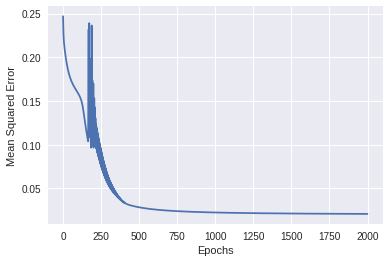

In [0]:
ffn = FirstFFNetwork()
ffn.fit(X_train, Y_train, epochs=2000, learning_rate=.01, display_loss=True)

In [0]:
Y_pred_train = ffn.predict(X_train)
Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
Y_pred_val = ffn.predict(X_val)
Y_pred_binarised_val = (Y_pred_val >= 0.5).astype("int").ravel()
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
accuracy_val = accuracy_score(Y_pred_binarised_val, Y_val)

print("Training accuracy", round(accuracy_train, 2))
print("Validation accuracy", round(accuracy_val, 2))

Training accuracy 0.98
Validation accuracy 0.94


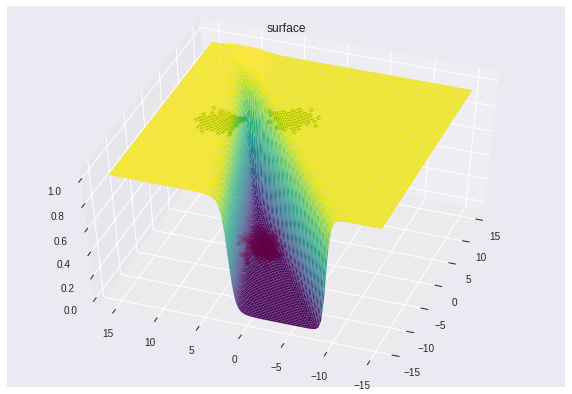

In [0]:
plt.figure(figsize=(10,7))
ax9=plt.axes(projection='3d')
X1=np.linspace(-15,15,100)
X2=np.linspace(-15,15,100)
XX1,XX2=np.meshgrid(X1,X2)
YY=np.zeros(XX1.shape)
for i in range(X2.size):
  for j in range(X1.size):
    YY[i,j]=ffn.predict2(X1[j],X2[i])
ax9.plot_surface(XX1, XX2, YY, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax9.scatter3D(list(X_train[:,0]),list(X_train[:,1]),list(Y_train),c=list(Y_train),cmap=my_cmap)
ax9.set_title('surface')
ax9.view_init(50,200)

[]

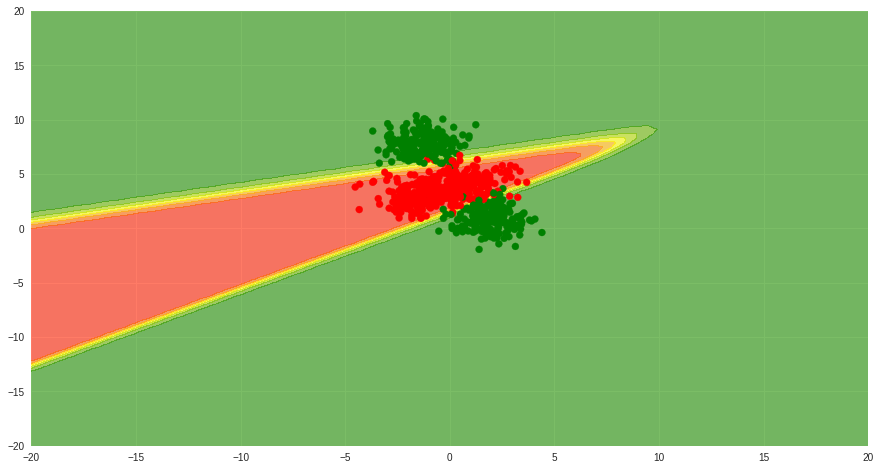

In [0]:
plt.figure(figsize=(15,8))
ax21=plt.subplot()
X1=np.linspace(-20,20,100)
X2=np.linspace(-20,20,100)
XX1,XX2=np.meshgrid(X1,X2)
YY=np.zeros(XX1.shape)
for i in range(X2.size):
  for j in range(X1.size):
     YY[i,j]=ffn.predict2(X1[j],X2[i])
ax21.contourf(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
ax21.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=my_cmap)
ax21.plot()

In [0]:
def plot_sn3(ffn,ax90):
  #ax9=plt.axes(projection='3d')
  X1=np.linspace(-15,15,100)
  X2=np.linspace(-15,15,100)
  XX1,XX2=np.meshgrid(X1,X2)
  YY=np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      YY[i,j]=ffn.predict2(X1[j],X2[i])
  ax90.plot_surface(XX1, XX2, YY, rstride=1, cstride=1,cmap='viridis', edgecolor='none')
  ax90.scatter3D(list(X_train[:,0]),list(X_train[:,1]),list(Y_train),c=list(Y_train),cmap=my_cmap)
  #ax90.view_init(50,200)
  #ax90.set_title('surface')

In [0]:

def animate(i):
  for x,y in zip(X_train,Y_train):
    ffn.fit2(x,y,1,0.2,False,False)
    ax90.clear()
    
  plot_sn3(ffn,ax90)

In [0]:
figggg,ax90 = plt.subplots()
ax90 = plt.axes(projection='3d')
ffn.fit2(X_train[0],Y_train[0],1,1,True,False)    
anim = animation.FuncAnimation(figggg, animate,40,interval=90 ,blit=False)#repeat=False#(0.375)*1e+3
HTML(anim.to_html5_video())

"figggg,ax90 = plt.subplots()\nax90 = plt.axes(projection='3d')\nffn.fit2(X_train[0],Y_train[0],1,1,True,False)    \nanim = animation.FuncAnimation(figggg, animate,40,interval=90 ,blit=False)#repeat=False#(0.375)*1e+3\nHTML(anim.to_html5_video())"

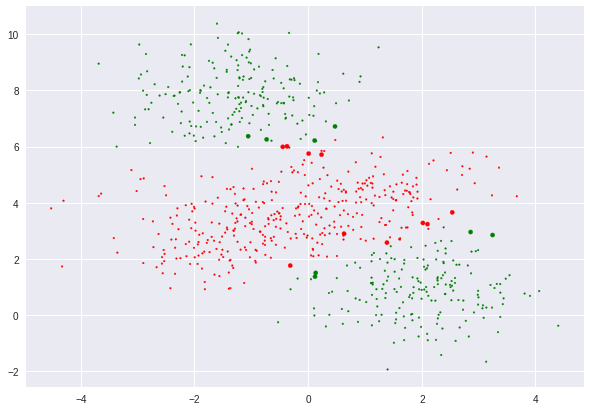

In [0]:
plt.figure(figsize=(10,7),edgecolor='w',frameon=True)
#plt.axes(projection='2d')
plt.scatter(X_train[:,0],X_train[:,1],c=Y_pred_binarised_train,cmap=my_cmap,s=15*(np.abs(Y_pred_binarised_train-Y_train)+.2))
plt.show()